In [ ]:
%load_ext autoreload
%autoreload 2
import sys

# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import emd
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from statistics import mean
import statistics
from dateutil.parser import parse
import statistics as st

In [ ]:
from datetime import datetime

datetime.now()

In [ ]:
exp_df = pd.DataFrame()
for i in np.arange(0, 5):
    df = pd.read_csv(
        f"/home/aevans/nwp_bias/src/machine_learning/notebooks/bkln/bkln_{i}.csv"
    )
    exp_df = pd.concat([df, exp_df])

In [ ]:
my_stations = exp_df["station"].unique()

In [ ]:
my_stations

In [ ]:
my_stations = np.delete(my_stations, 0)
my_stations = np.delete(my_stations, 6)
my_stations = np.delete(my_stations, -3)

In [ ]:
my_stations

In [ ]:
exp_df = exp_df.sort_values("forecast_hour")

In [ ]:
bkln_df = exp_df[exp_df["station"] == "BKLN"]
want_df = exp_df[exp_df["station"] == "WANT"]
tyro_df = exp_df[exp_df["station"] == "TYRO"]
wall_df = exp_df[exp_df["station"] == "WALL"]
medu_df = exp_df[exp_df["station"] == "MEDU"]
addi_df = exp_df[exp_df["station"] == "ADDI"]
fred_df = exp_df[exp_df["station"] == "FRED"]
ches_df = exp_df[exp_df["station"] == "CHES"]
oppe_df = exp_df[exp_df["station"] == "OPPE"]
gabr_df = exp_df[exp_df["station"] == "GABR"]
loui_df = exp_df[exp_df["station"] == "LOUI"]

In [ ]:
fig, ax = plt.subplots(figsize=(24, 9))
plt.title("Forecast Hour Drift", fontsize=28)
plt.xlabel("HRRR Forecast Hour", fontsize=18)
plt.ylabel("Min Test Loss", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# stations
plt.plot(
    bkln_df["forecast_hour"],
    bkln_df["test_loss (Min)"],
    c="indigo",
    marker="d",
    markersize=12,
    linewidth=2,
    label="Brooklyn",
    zorder=7,
)
plt.plot(
    want_df["forecast_hour"],
    want_df["test_loss (Min)"],
    c="olive",
    marker="v",
    markersize=12,
    linewidth=2,
    label="Wantagh",
    zorder=7,
    alpha=0.4,
)
plt.plot(
    tyro_df["forecast_hour"],
    tyro_df["test_loss (Min)"],
    c="forestgreen",
    marker="o",
    markersize=12,
    linewidth=2,
    label="Tyrone",
    zorder=7,
    alpha=0.4,
)
plt.plot(
    wall_df["forecast_hour"],
    wall_df["test_loss (Min)"],
    c="goldenrod",
    marker="s",
    markersize=12,
    linewidth=2,
    label="Wallkill",
    zorder=7,
    alpha=0.4,
)
plt.plot(
    medu_df["forecast_hour"],
    medu_df["test_loss (Min)"],
    c="teal",
    marker="^",
    markersize=12,
    linewidth=2,
    label="Medusa",
    zorder=7,
    alpha=0.4,
)
plt.plot(
    addi_df["forecast_hour"],
    addi_df["test_loss (Min)"],
    c="darkred",
    marker="X",
    markersize=12,
    linewidth=2,
    label="Addison",
    zorder=7,
    alpha=1.0,
)
plt.plot(
    fred_df["forecast_hour"],
    fred_df["test_loss (Min)"],
    c="sienna",
    marker="p",
    markersize=12,
    linewidth=2,
    label="Fredonia",
    zorder=7,
    alpha=0.4,
)
plt.plot(
    ches_df["forecast_hour"],
    ches_df["test_loss (Min)"],
    c="darkorange",
    marker="P",
    markersize=12,
    linewidth=2,
    label="Chestertown",
    zorder=7,
    alpha=1.0,
)

plt.plot(
    oppe_df["forecast_hour"],
    oppe_df["test_loss (Min)"],
    c="royalblue",
    marker="<",
    markersize=12,
    linewidth=2,
    label="Oppenheim",
    zorder=7,
    alpha=1.0,
)
plt.plot(
    gabr_df["forecast_hour"],
    gabr_df["test_loss (Min)"],
    c="violet",
    marker=">",
    markersize=12,
    linewidth=2,
    label="Gabriels",
    zorder=7,
)
plt.plot(
    loui_df["forecast_hour"],
    loui_df["test_loss (Min)"],
    c="deeppink",
    marker="D",
    markersize=12,
    linewidth=2,
    label="Louisville",
    zorder=7,
)
plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left", borderaxespad=0, fontsize=16)

In [ ]:
for i in np.arange(2, 19, 2):
    print(i)

In [ ]:
nysm_cats_path = "/home/aevans/nwp_bias/src/landtype/data/nysm.csv"

nysm_cats_df = pd.read_csv(nysm_cats_path)

In [ ]:
triangles = ["BKLN", "STAT", "QUEE", "MANH"]
triangle = nysm_cats_df[nysm_cats_df["stid"].isin(triangles)]


nysm_cats_df = nysm_cats_df[nysm_cats_df["stid"].isin(my_stations)]
nysm_cats_df

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

colors = [
    "forestgreen",
    "olive",
    "goldenrod",
    "teal",
    "darkred",
    "indigo",
    "sienna",
    "darkorange",
    "royalblue",
    "deeppink",
    "violet",
]
j = 0

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(
    1,
    1,
    1,
    projection=ccrs.LambertConformal(
        central_longitude=-75.0, standard_parallels=(49, 77)
    ),
)

# Replace 'your_shapefile.shp' with the path to your shapefile
shapefile_path = '/home/aevans/nwp_bias/src/machine_learning/notebooks/data/GIS.OFFICIAL_CLIM_DIVISIONS.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Load the boundaries of New York State (replace with your actual file path)
ny_state_boundaries_path = '/home/aevans/nwp_bias/src/landtype/data/State.shx'

# Read the shapefile and set the CRS explicitly
ny_state_boundaries_geo = gpd.read_file(ny_state_boundaries_path).to_crs(epsg=4326)

# Get the bounding box of New York State
ny_bbox = ny_state_boundaries_geo.total_bounds

# Filter the GeoDataFrame to include only polygons within New York State
gdf_filtered = gdf.cx[ny_bbox[0]:ny_bbox[2], ny_bbox[1]:ny_bbox[3]]
gdf_filtered = gdf_filtered.iloc[20:29]

# Create a categorical column for coloring
gdf_filtered['category'] = np.arange(len(gdf_filtered))

# Plot the shapefile with multiple colors based on the 'category' column
gdf_filtered.plot(ax=ax, transform=ccrs.PlateCarree(), column='category', cmap='tab10', alpha=0.3)

# Plot scatter points
for s in my_stations:
    df = nysm_cats_df[nysm_cats_df["stid"] == s]
    ax.scatter(
        df["lon [degrees]"],
        df["lat [degrees]"],
        c=colors[j],
        s=250,
        edgecolors="black",
        transform=ccrs.PlateCarree(),
        zorder=10,
        label=s,
    )
    j += 1

# Set extent for the plot
ax.set_extent([-79.82, -72.0, 40.48, 44.9], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.BORDERS.with_scale("50m"), linestyle=":", zorder=1)
ax.add_feature(cfeature.STATES.with_scale("50m"), linestyle=":", zorder=1)
ax.add_feature(cfeature.LAKES.with_scale("50m"), zorder=1)
ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="black",
    alpha=0.5,
    linestyle="--",
)
ax.xticklabels_top = False
ax.ylabels_right = False

# Annotate scatter points with station IDs
for i, row in nysm_cats_df.iterrows():
    lon, lat = row['lon [degrees]'], row['lat [degrees]']
    ax.annotate(row['stid'], (lon, lat), textcoords="offset points", xytext=(0, 7), ha='center', fontsize=12, color='black', transform=ccrs.PlateCarree())

# Display the plot
plt.show()

In [ ]:
# need 0 row 
gdf_filtered_1 = gdf_filtered.iloc[20:30]
gdf_filtered_1

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(
    1,
    1,
    1,
    projection=ccrs.LambertConformal(
        central_longitude=-75.0, standard_parallels=(49, 77)
    ),
)
# Plot the shapefile with multiple colors based on the 'category' column
gdf_filtered_1.plot(ax=ax, transform=ccrs.PlateCarree(), column='category', cmap='gist_ncar', alpha=0.3)

In [ ]:
import rasterio
import cartopy.crs as crs
import cartopy.feature as cfeature

# Replace 'ny_dem.tif' with the path to your downloaded DEM file
ny_dem = "/home/aevans/nwp_bias/src/landtype/data/Map.tif"
colors = [
    "forestgreen",
    "olive",
    "goldenrod",
    "teal",
    "darkred",
    "indigo",
    "sienna",
    "darkorange",
    "royalblue",
    "violet",
    "deeppink",
]
j = 0

skip = 5

# Open the DEM file using rasterio
with rasterio.open(ny_dem) as src:
    elevation_data = src.read(
        1
    )  # Read the first band (assuming it's the elevation data)
    elevation_transform = src.transform
# Get the number of rows and columns in the elevation data
rows, cols = elevation_data.shape

# Create 2D arrays of coordinates using numpy.meshgrid
lons, lats = np.meshgrid(
    np.linspace(
        elevation_transform[2],
        elevation_transform[2] + cols * elevation_transform[0],
        cols,
    ),
    np.linspace(
        elevation_transform[5],
        elevation_transform[5] + rows * elevation_transform[4],
        rows,
    ),
)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(
    1,
    1,
    1,
    projection=crs.LambertConformal(
        central_longitude=-75.0, standard_parallels=(49, 77)
    ),
)

# ax.add_feature(cfeature.LAND.with_scale('50m'), zorder=3)
ax.add_feature(cfeature.OCEAN.with_scale("50m"), zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("50m"), linestyle=":", zorder=1)
ax.add_feature(cfeature.STATES.with_scale("50m"), linestyle=":", zorder=1)
ax.add_feature(cfeature.LAKES.with_scale("50m"), zorder=1)
ax.gridlines(
    crs=crs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="black",
    alpha=0.5,
    linestyle="--",
)
ax.xticklabels_top = False
ax.ylabels_right = False

plt.contourf(
    lons[::skip, ::skip],
    lats[::skip, ::skip],
    elevation_data[::skip, ::skip],
    transform=crs.PlateCarree(),
    levels=np.arange(0, 1500, 100),
    cmap="gist_earth_r",
    zorder=0,
)
for s in my_stations:
    df = nysm_cats_df[nysm_cats_df["stid"] == s]
    plt.scatter(
        df["lon [degrees]"],
        df["lat [degrees]"],
        c=colors[j],
        s=250,
        edgecolors="black",
        transform=crs.PlateCarree(),
        zorder=10,
        label=s,
    )
    j += 1

ax.set_extent([-79.82, -72.0, 40.48, 44.9])
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left", borderaxespad=0, fontsize=16)

In [ ]:
def load_nysm_data():
    # these parquet files are created by running "get_resampled_nysm_data.ipynb"
    nysm_path = "/home/aevans/nwp_bias/data/nysm/"

    nysm_1H = []
    for year in np.arange(2018, 2023):
        df = pd.read_parquet(f"{nysm_path}nysm_1H_obs_{year}.parquet")
        df.reset_index(inplace=True)
        nysm_1H.append(df)
    nysm_1H_obs = pd.concat(nysm_1H)
    nysm_1H_obs["snow_depth"] = nysm_1H_obs["snow_depth"].fillna(0)
    nysm_1H_obs.fillna(-999, inplace=True)
    return nysm_1H_obs

In [ ]:
def read_hrrr_data():
    """
    Reads and concatenates parquet files containing forecast and error data for HRRR weather models
    for the years 2018 to 2022.

    Returns:
        pandas.DataFrame: of hrrr weather forecast information for each NYSM site.
    """

    years = ["2018", "2019", "2020", "2021", "2022"]
    savedir = "/home/aevans/ai2es/processed_data/HRRR/ny/"

    # create empty lists to hold dataframes for each model
    hrrr_fcast_and_error = []

    # loop over years and read in parquet files for each model
    for year in years:
        for month in np.arange(1, 13):
            str_month = str(month).zfill(2)
            if (
                os.path.exists(
                    f"{savedir}HRRR_{year}_{str_month}_direct_compare_to_nysm_sites_mask_water.parquet"
                )
                == True
            ):
                hrrr_fcast_and_error.append(
                    pd.read_parquet(
                        f"{savedir}HRRR_{year}_{str_month}_direct_compare_to_nysm_sites_mask_water.parquet"
                    )
                )
            else:
                continue

    # concatenate dataframes for each model
    hrrr_fcast_and_error_df = pd.concat(hrrr_fcast_and_error)
    hrrr_fcast_and_error_df = hrrr_fcast_and_error_df.reset_index().dropna()

    # return dataframes for each model
    return hrrr_fcast_and_error_df

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd


def format_climate_df(data_path):
    """
    Formats a climate data file located at the specified `data_path` into a pandas DataFrame.

    Args:
        data_path (str): The file path for the climate data file.

    Returns:
        pandas.DataFrame: A DataFrame containing the climate data, with the first column renamed to "year".
    """
    raw_index = np.loadtxt(f"{data_path}")
    cl_index = pd.DataFrame(raw_index)
    cl_index = cl_index.rename(columns={0: "year"})
    return cl_index

In [ ]:
def groupby_month(df, col):
    df = df[df[col] > -999]
    GB = df.groupby([(df.valid_time.dt.year), (df.valid_time.dt.month)])[col].mean()
    the_list = GB.tolist()
    fig, ax = plt.subplots(figsize=(21, 6))
    plt.plot(the_list)
    ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])
    ax.set_xticks(np.arange(0, len(the_list), int(len(the_list) / 5)))
    return the_list

In [ ]:
def groupby_month_hrrr(df, col):
    df = df[df[col] > -999]
    GB = df.groupby([(df.time.dt.year), (df.time.dt.month)])[col].mean()
    the_list = GB.tolist()
    fig, ax = plt.subplots(figsize=(21, 6))
    plt.plot(the_list)
    ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])
    ax.set_xticks(np.arange(0, 60, 12))
    return the_list

In [ ]:
def anoms_detection_hrrr(df, means, col):
    anoms = []

    for i, _ in enumerate(df["time"]):
        t = df["time"].iloc[i]
        tair = df[col].iloc[i]
        dt_object = parse(str(t))
        year = dt_object.strftime("%Y")
        month = dt_object.strftime("%m")

        for m in np.arange(1, 13):
            if year == str(2018) and month == str(m).zfill(2):
                new_means = means[:12]
                anom = tair - new_means[m - 1]
                anoms.append(anom)
            if year == str(2019) and month == str(m).zfill(2):
                new_means = means[12:24]
                anom = tair - new_means[m - 1]
                anoms.append(anom)
            if year == str(2020) and month == str(m).zfill(2):
                new_means = means[24:36]
                anom = tair - new_means[m - 1]
                anoms.append(anom)
            if year == str(2021) and month == str(m).zfill(2):
                new_means = means[36:48]
                anom = tair - new_means[m - 1]
                anoms.append(anom)
            if year == str(2022) and month == str(m).zfill(2):
                new_means = means[48:60]
                anom = tair - new_means[m - 1]
                anoms.append(anom)

    fig, ax = plt.subplots(figsize=(21, 7))
    plt.plot(anoms, c="red")
    print(len(anoms))
    ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])
    ax.set_xticks(np.arange(0, len(anoms), (len(anoms) / 5)))

In [ ]:
def anoms_detection(df, means, col):
    times = []
    anoms = []

    df = df[df["valid_time"] > datetime(2022, 7, 20, 0, 0, 0)]
    df = df[df["valid_time"] < datetime(2022, 8, 11, 0, 0, 0)]

    for i, _ in enumerate(df["valid_time"]):
        t = df["valid_time"].iloc[i]
        tair = df[col].iloc[i]
        dt_object = parse(str(t))
        year = dt_object.strftime("%Y")
        month = dt_object.strftime("%m")

        for m in np.arange(1, 13):
            new_means = st.mean(means)
            anom = tair - new_means
            anoms.append(anom)
            times.append(t)

            # if year == str(2018) and month == str(m).zfill(2):
            #     new_means = means[:12]
            #     anom = tair - new_means[m-1]
            #     anoms.append(anom)
            # if year == str(2019) and month == str(m).zfill(2):
            #     new_means = means[12:24]
            #     anom = tair - new_means[m-1]
            #     anoms.append(anom)
            # if year == str(2020) and month == str(m).zfill(2):
            #     new_means = means[24:36]
            #     anom = tair - new_means[m-1]
            #     anoms.append(anom)
            # if year == str(2021) and month == str(m).zfill(2):
            #     new_means = means[36:48]
            #     anom = tair - new_means[m-1]
            #     anoms.append(anom)
            # if year == str(2022) and month == str(m).zfill(2):
            #     new_means = means[48:60]
            #     anom = tair - new_means[m-1]
            #     anoms.append(anom)

    fig, ax = plt.subplots(figsize=(21, 6))
    plt.plot(times, anoms, c="red")
    print(len(anoms))
    # ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])
    # ax.set_xticks(np.arange(0, len(anoms), (len(anoms) / 5)))

In [ ]:
# directory = sorted(os.listdir("/home/aevans/nwp_bias/src/correlation/data/indexes"))

# # years = ['2018', '2019', '2020', '2021', '2022']
# years = np.arange(2018, 2023)
# for d in directory:
#     if d != "csv":
#         path = f"/home/aevans/nwp_bias/src/correlation/data/indexes/{d}"
#         cldf = format_climate_df(path)
#         cldf = cldf[cldf["year"].isin(years)]
#         filename = d

#         # plot
#         parts = filename.split(".")
#         title = parts[0]
#         cldf = cldf.drop(columns=["year"])
#         y = []
#         for d, _ in enumerate(cldf[1]):
#             vals = cldf.iloc[d]
#             for v in vals:
#                 y.append(v)

#         x = np.arange(0, len(y))
#         print(len(y))

#         fig, ax = plt.subplots(figsize=(21, 7))
#         plt.plot(
#             x,
#             y,
#         )
#         plt.title(f"{title}")
#         ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])
#         ax.set_xticks(np.arange(0, len(y), (len(y) / 5)))
#         ax.axhline(y=0, c="black")
#         ax.set_ylim(-3, 3)
#         plt.show()

In [ ]:
hrrr_df = read_hrrr_data()
# hrrr_df = hrrr_df[hrrr_df["station"] == "OLEA"]
hrrr_df.keys()

In [ ]:
hrrr_df = hrrr_df[hrrr_df["station"] == "BKLN"]

In [ ]:
hrrr_df
# Filter for summer months (assuming summer is June, July, and August)

In [ ]:
nysm_df = load_nysm_data()

In [ ]:
nysm_df["station"].unique()

In [ ]:
nysm_df = nysm_df[nysm_df["station"] == "BKLN"]

In [ ]:
nysm_df = nysm_df[nysm_df["tair"] > -100]
nysm_df = nysm_df.rename(columns={"time_1H": "valid_time"})
nysm_df.dropna(inplace=True)

summer_df = nysm_df[
    (nysm_df["valid_time"].dt.month >= 5) & (nysm_df["valid_time"].dt.month <= 9)
]

In [ ]:
# df = pd.read_parquet(
#     "/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20231204/WANT/WANT_loss_0.05465654283761978_ml_output.parquet"
# )
# df = df.sort_index()

In [ ]:
df

In [ ]:
nysm_df[39490:40960]

In [ ]:
# tcc_means = groupby_month_hrrr(hrrr_df, "tcc")

In [ ]:
# anoms_detection_hrrr(hrrr_df, tcc_means, "tcc")

In [ ]:
for k in summer_df.keys():
    print(k)

In [ ]:
t2m_means = groupby_month(summer_df, "tair")

In [ ]:
df = summer_df[summer_df["valid_time"] > datetime(2022, 7, 7, 0, 0, 0)]
df = df[df["valid_time"] < datetime(2022, 8, 15, 0, 0, 0)]

In [ ]:
fig, ax = plt.subplots(figsize=(21, 6))

# Plotting the temperature data
ax.plot(df["valid_time"], df["tair"], color="darkorange", label="Temperature")

# Plotting the horizontal line for the mean temperature
mean_temp = st.mean(t2m_means)
ax.axhline(
    mean_temp,
    color="red",
    linestyle="--",
    label=f"Summer Average for BKLN = {round(mean_temp, 2)}",
)

# Adding legend
ax.legend()

ax.set_title("Brooklyn NYSM 2 Meter Temperature", fontsize=24)
ax.set_ylabel("Degrees Celsius", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylim(21, 36)

plt.show()

In [ ]:
relh_means = groupby_month(summer_df, "relh")

In [ ]:
fig, ax = plt.subplots(figsize=(21, 6))

# Plotting the temperature data
ax.plot(df["valid_time"], df["relh"], color="green", label="Temperature")

# Plotting the horizontal line for the mean temperature
mean_temp = st.mean(relh_means)
ax.axhline(
    mean_temp,
    color="red",
    linestyle="--",
    label=f"Summer Average for BKLN = {round(mean_temp, 2)}",
)

# Adding legend
ax.legend()

ax.set_title("Brooklyn NYSM 2 Meter Temperature", fontsize=24)
ax.set_ylabel("% Humidity", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
# ax.set_ylim(15, 40)

plt.show()

In [ ]:
wind_means = groupby_month(summer_df, "wmax_sonic")

In [ ]:
# Assuming you have 't2m_means' defined somewhere

fig, ax = plt.subplots(figsize=(21, 6))

# Plotting the temperature data
ax.plot(df["valid_time"], df["wmax_sonic"], color="blue", label="Temperature")

# Plotting the horizontal line for the mean temperature
mean_temp = st.mean(wind_means)
ax.axhline(
    mean_temp,
    color="red",
    linestyle="--",
    label=f"Summer Average for BKLN = {round(mean_temp, 2)}",
)

# Adding legend
ax.legend()

ax.set_title("Brooklyn NYSM 2 Meter Temperature", fontsize=24)
ax.set_ylabel("Meters / Second", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
# ax.set_ylim(15, 40)

plt.show()

In [ ]:
p_means = groupby_month(summer_df, "precip_total")

In [ ]:
# Assuming you have 't2m_means' defined somewhere
fig, ax = plt.subplots(figsize=(21, 6))

# Plotting the temperature data
ax.plot(df["valid_time"], df["precip_total"], color="purple", label="Temperature")

# Plotting the horizontal line for the mean temperature
mean_temp = st.mean(p_means)
ax.axhline(
    mean_temp,
    color="red",
    linestyle="--",
    label=f"Summer Average for BKLN = {round(mean_temp, 2)}",
)

# Adding legend
ax.legend()

ax.set_title("Brooklyn NYSM 2 Meter Temperature", fontsize=24)
ax.set_ylabel("Millimeters / Hour", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
# ax.set_ylim(15, 40)

plt.show()

In [ ]:
def calc_hi(T, RH):
    _hi = (
        -42.379
        + 2.04901523 * T
        + 10.14333127 * RH
        - 0.22475541 * T * RH
        - 0.00683783 * T * T
        - 0.05481717 * RH * RH
        + 0.00122874 * T * T * RH
        + 0.00085282 * T * RH * RH
        - 0.00000199 * T * T * RH * RH
    )

    return _hi

In [ ]:
def f_to_c(ls):
    new_ls = []
    for i in ls:
        new = (i - 32)*(5/9)
        new_ls.append(new)
    return new_ls

In [ ]:
def heat_index(df):
    heat_index = []
    for i, _ in enumerate(df["valid_time"]):
        T = df["tair"].iloc[i]
        T = T * (9 / 5) + 32
        RH = df["relh"].iloc[i]

        hi = calc_hi(T, RH)
        heat_index.append(hi)
    new_heat = f_to_c(heat_index)
    return new_heat

In [ ]:
heat_index = heat_index(df)

In [ ]:
heat_index

In [ ]:
# Assuming you have 't2m_means' defined somewhere
fig, ax = plt.subplots(figsize=(21, 6))

# Plotting the temperature data
ax.plot(df["valid_time"], heat_index, color="maroon", label="Temperature")

# Plotting the horizontal line for the mean temperature
mean_temp = st.mean(heat_index)
ax.axhline(
    mean_temp,
    color="red",
    linestyle="--",
    label=f"Summer Average for BKLN = {round(mean_temp, 2)}",
)

# Adding legend
ax.legend()

ax.set_title("Brooklyn NYSM Heat Index", fontsize=24)
ax.set_ylabel("Degrees Fahrenheit", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

plt.show()

In [ ]:
elec_df = pd.read_csv(
    "/home/aevans/nwp_bias/data/model_data/nyc_electricity/nyc_elec_load_july_aug_2022.csv"
)

In [ ]:
elec_df

In [ ]:
date_format = "%m/%d/%Y %H:%M:%S"

dates = []

for i, _ in enumerate(elec_df["Time Stamp"]):
    date_string = elec_df["Time Stamp"].iloc[i]
    # Convert the string to a datetime object
    datetime_object = datetime.strptime(date_string, date_format)
    dates.append(datetime_object)

In [ ]:
elec_df["valid_time"] = dates

In [ ]:
elec_df

In [ ]:
df2 = elec_df[elec_df["valid_time"] > datetime(2022, 7, 7, 0, 0, 0)]
df2 = df2[df2["valid_time"] < datetime(2022, 8, 15, 0, 0, 0)]

In [ ]:
df2

In [ ]:
# Sum up the 'value' column for each hour
hourly_sum = df2.groupby([(df2.valid_time.dt.hour)])["Load"].sum()

In [ ]:
hourly_sum

In [ ]:
# Assuming you have 't2m_means' defined somewhere
fig, ax = plt.subplots(figsize=(21, 6))


# Plotting the temperature data
ax.plot(df2["valid_time"], df2["Load"], color="black", label="Electrical Load for NYC")
ax.plot(df["valid_time"], heat_index, color="maroon", label="Temperature")
# Plotting the temperature data
ax.plot(df["valid_time"], df["tair"], color="darkorange", label="Temperature")

# Plotting the horizontal line for the mean temperature
mean_temp = st.mean(heat_index)
ax.axhline(
    5500, color="red", linestyle="--", label=f"Average electricity load = 5500 MW"
)

# Adding legend
ax.legend()

ax.set_title("NYC Electrical Load", fontsize=24)
ax.set_ylabel("Megawatts", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
# ax.set_ylim(80, 105)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st

# Assuming you have 't2m_means' and 'df2' defined somewhere
fig, ax = plt.subplots(figsize=(21, 6))

# Plotting the temperature data on the primary y-axis
ax.plot(df2["valid_time"], df2["Load"], color="black", label="Electrical Load for NYC", linewidth=3)
ax.set_ylabel("Megawatts", fontsize=12)

# Creating a second y-axis
ax2 = ax.twinx()

# Plotting the first temperature data on the second y-axis
ax2.plot(df["valid_time"], df["tair"], color="darkorange", label="Temperature")
ax2.set_ylabel("Degrees Celsius", fontsize=12)
# Set the y-axis limits for ax2
ax2.set_ylim(ymin=15, ymax=40)

# Creating a third y-axis
ax3 = ax.twinx()

# Plotting the second temperature data on the third y-axis
ax3.plot(df["valid_time"], heat_index, color="blue", label="Heat Index")
ax3.set_ylim(ymin=15, ymax=40)


ax.axhline(
    5500, color="red", linestyle="--", label=f"Average electricity load = 5500 MW"
)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

ax.set_title("NYC Electrical Load and Temperature", fontsize=24)
ax.set_xlabel("Date", fontsize=12)

plt.show()


In [ ]:
td_means = groupby_month(hrrr_df, "d2m")

In [ ]:
anoms_td = anoms_detection(hrrr_df, td_means, "d2m")

In [ ]:
relh_means = groupby_month(hrrr_df, "r2")

In [ ]:
anoms_detection(hrrr_df, relh_means, "r2")

In [ ]:
srad_means = groupby_month(hrrr_df, "dswrf")

In [ ]:
anoms_detection(hrrr_df, srad_means, "dswrf")

In [ ]:
pres_means = groupby_month(hrrr_df, "mslma")

In [ ]:
anoms_detection(hrrr_df, pres_means, "mslma")

In [ ]:
mslp_means = groupby_month(nysm_df, "mslp")

In [ ]:
anoms_detection(nysm_df, mslp_means, "mslp")

In [ ]:
wspd_means = groupby_month(hrrr_df, "u_total")

In [ ]:
anoms_detection(hrrr_df, wspd_means, "u_total")

In [ ]:
precip_means = groupby_month(hrrr_df, "new_tp")

In [ ]:
anoms_detection(hrrr_df, precip_means, "new_tp")

In [ ]:
snow_means = groupby_month(hrrr_df, "asnow")

In [ ]:
anoms_detection(hrrr_df, snow_means, "asnow")

In [ ]:
# now we can estimate the IMFs for the signal
x = nysm_df["tair"]
imf = emd.sift.sift(x)
print(imf.shape)

and, from the IMFs, compute the instantaneous frequency, phase and amplitude using the Normalised Hilbert Transform Method:

In [ ]:
IP, IF, IA = emd.spectra.frequency_transform(imf, 23618, "hilbert")

From the instantaneous frequency and amplitude, we can compute the Hilbert-Huang spectrum:

In [ ]:
# Define frequency range (low_freq, high_freq, nsteps, spacing)
freq_range = (0.1, 10, 80, "log")
f, hht = emd.spectra.hilberthuang(IF, IA, freq_range, sum_time=False)

In [ ]:
# # visualize
# fig = plt.figure(figsize=(25, 3))
# plt.plot(nysm_df["tair"])

In [ ]:
# df.iloc[:, 9:11]

Plot the IMFs

In [ ]:
emd.plotting.plot_imfs(imf)

In [ ]:
sample_rate = 23618
time_vect = np.linspace(0, sample_rate)
fig = plt.figure(figsize=(15, 9))
emd.plotting.plot_hilberthuang(hht, time_vect, f, fig=fig, log_y=True)

# ensemble sifting 

In [ ]:
x = nysm_df["wspd_sonic"]
imf_opts = {"sd_thresh": 0.05}

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<Axes: xlabel='Time (samples)'>

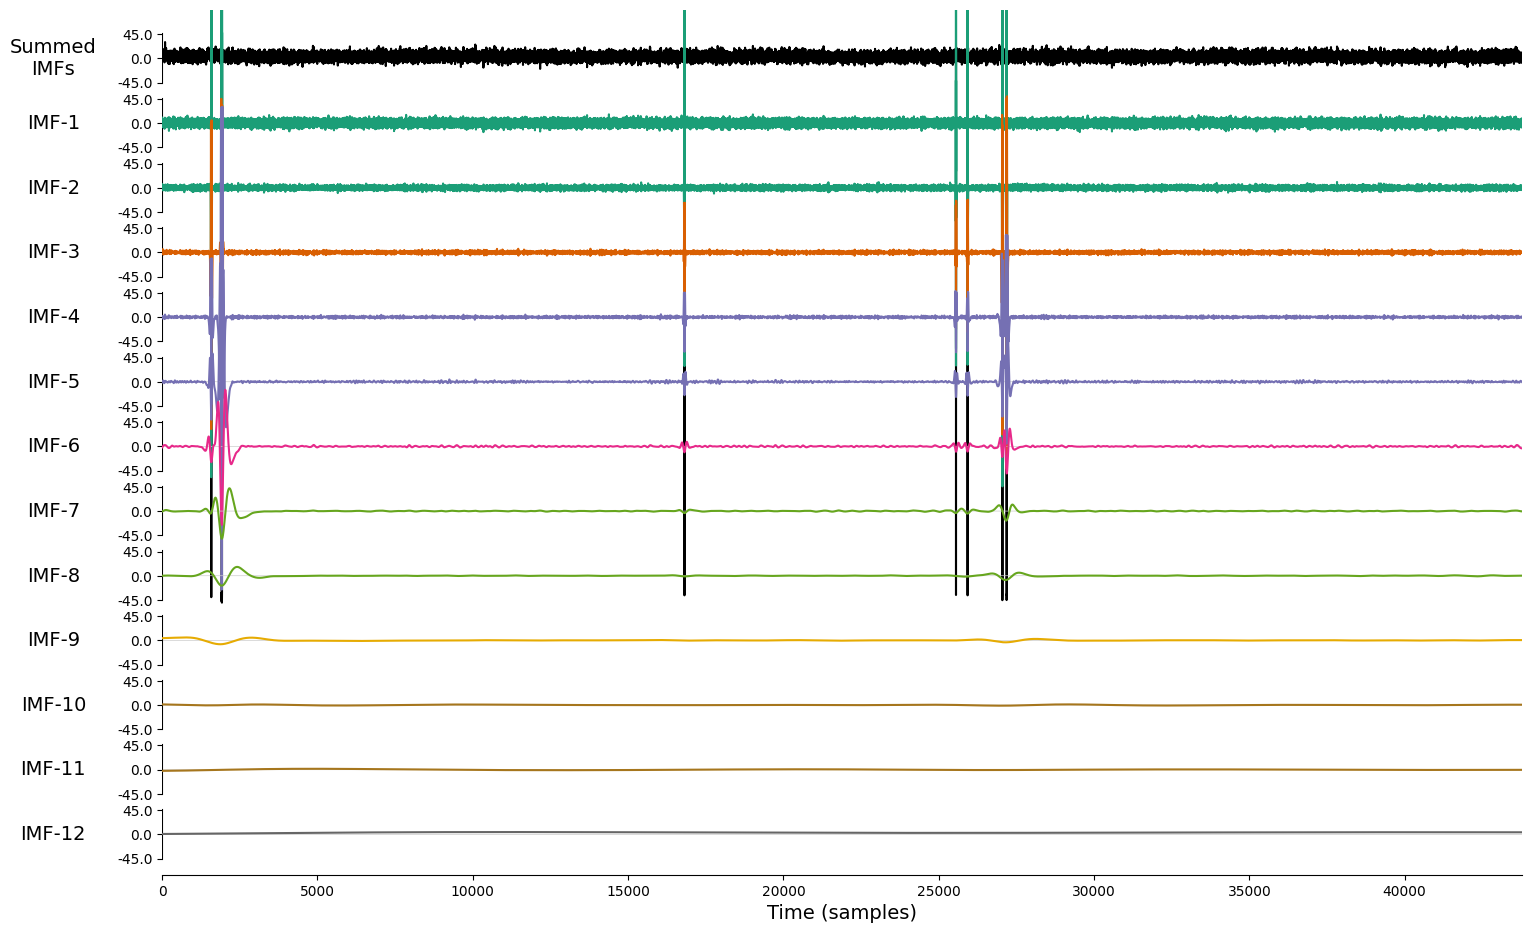

In [137]:
imf = emd.sift.ensemble_sift(
    x, nensembles=42, nprocesses=12, ensemble_noise=1, imf_opts=imf_opts
)
emd.plotting.plot_imfs(imf)

In [138]:
imf.shape

(43784, 12)

and now the Hilbert-Huang transform of this decomposition

In [139]:
sample_rate = 23618

time_vect = np.linspace(0, sample_rate - 0.5)

<Axes: title={'center': 'Hilbert-Huang Transform'}, xlabel='Time', ylabel='Frequency'>

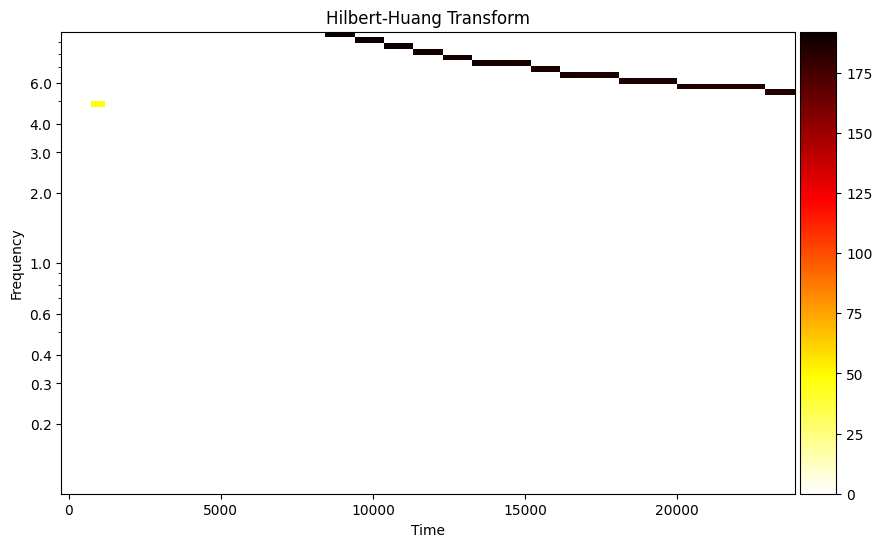

In [140]:
fig = plt.figure(figsize=(10, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f, fig=fig, log_y=True)